<h1>Capstone 1</h1>
<h2>Wine Quality Data Set, UC Irvine</h2> 
(Source: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009)
<h4>Audrey Rager</h4>
<h4>September 20, 2020</h4>
<h2>Import Python Packages</h2>

In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import datetime as dt
import statsmodels.api as sm
from scipy.stats import norm
import statsmodels.stats.weightstats as smsw
import pylab

# Import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
#from sklearn import cross_validation
from scipy import stats as st
import warnings 
warnings.filterwarnings('ignore')

# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')


<h2>Data Wrangling</h2>

In [2]:
#Import csv files into Pandas data frames
reddf = pd.read_csv('winequality-red.csv',sep=";")
whitedf = pd.read_csv('winequality-white.csv',sep=";")


In [3]:
#Add 'wine type' column to each data frame and population with 'red' or 'white' for each
reddf['wine type'] = 'red'
whitedf['wine type'] = 'white'

In [4]:
#Look at the first few records of combined red wine dataframe with new column
reddf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
#Look at the first few records of combined white wine dataframe with new column
whitedf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [6]:
#combine the two dataframes for red and white wine into one data frame for all wines
winedf = reddf.append(whitedf, ignore_index=True)

<h5>Removing Outliers</h5>


In [7]:

ValueList = ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')

for myValue in ValueList:
    #compute range of data
    myValueMax = winedf[myValue].max()
    myValueMin = winedf[myValue].min()
    myValueRange = myValueMax - myValueMin
    
    # Computing IQR
    Q1 = winedf[myValue].quantile(0.25)
    Q3 = winedf[myValue].quantile(0.75)
    IQR = Q3 - Q1
    gtdropvalue = (Q3 + (1.5 * IQR))
    ltdropvalue = (Q1 - (1.5 * IQR))
    
    index_names_right = winedf[winedf[myValue] >= gtdropvalue].index
    index_names_left = winedf[winedf[myValue] <= ltdropvalue].index
    winedf.drop(index_names_right, inplace = True)
    winedf.drop(index_names_left, inplace = True)
    print(myValue + ' maximum: ' + str(myValueMax))
    print(myValue + ' minimum: ' + str(myValueMin))
    print(myValue + ' Q1: ' + str(Q1))
    print(myValue + ' Q3: ' + str(Q3))
    print(myValue + ' range: ' + str(myValueRange))
    print(myValue + ' IQR: ' + str(IQR))
    print('ratio of Range fo IQR: ' + str(myValueRange/IQR))
    print()
    
    


# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
#filtered = df.query('(@Q1 - 1.5 * @IQR) <= nb <= (@Q3 + 1.5 * @IQR)')

#df.drop(df[df['d'] >500000].index, inplace = True)

fixed acidity maximum: 15.9
fixed acidity minimum: 3.8
fixed acidity Q1: 6.4
fixed acidity Q3: 7.7
fixed acidity range: 12.100000000000001
fixed acidity IQR: 1.2999999999999998
ratio of Range fo IQR: 9.30769230769231

volatile acidity maximum: 1.58
volatile acidity minimum: 0.08
volatile acidity Q1: 0.22
volatile acidity Q3: 0.39
volatile acidity range: 1.5
volatile acidity IQR: 0.17
ratio of Range fo IQR: 8.823529411764705

citric acid maximum: 1.66
citric acid minimum: 0.0
citric acid Q1: 0.26
citric acid Q3: 0.38
citric acid range: 1.66
citric acid IQR: 0.12
ratio of Range fo IQR: 13.833333333333334

residual sugar maximum: 31.6
residual sugar minimum: 0.6
residual sugar Q1: 1.8
residual sugar Q3: 8.675
residual sugar range: 31.0
residual sugar IQR: 6.875000000000001
ratio of Range fo IQR: 4.509090909090909

chlorides maximum: 0.42200000000000004
chlorides minimum: 0.009000000000000001
chlorides Q1: 0.036000000000000004
chlorides Q3: 0.054000000000000006
chlorides range: 0.413000000

<h5>Checking for NULL Values</h5>


In [8]:
#Check for null values in Wine data
winedf.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine type               0
dtype: int64

<AxesSubplot:>

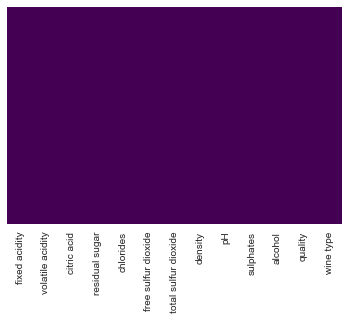

In [10]:
sns.heatmap(winedf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<h2>Exploratory Data Analysis</h2>

In [11]:
#Descriptive Statistics for Wine Data
winedf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000
mean,6.911399,0.283726,0.319456,5.927825,0.044523,33.056393,129.974645,0.993998,3.200975,0.493718,10.589092,5.917596
std,0.831594,0.100837,0.088763,4.735945,0.012686,15.352960,46.714524,0.002817,0.143386,0.108575,1.212198,0.865701
min,4.700000,0.080000,0.090000,0.600000,0.012000,2.000000,8.000000,0.987110,2.820000,0.220000,8.400000,3.000000
25%,6.400000,0.210000,0.260000,1.800000,0.036000,22.000000,101.000000,0.991705,3.100000,0.410000,9.500000,5.000000
50%,6.800000,0.270000,0.310000,4.600000,0.043000,32.000000,128.000000,0.993880,3.190000,0.480000,10.500000,6.000000
75%,7.400000,0.330000,0.370000,8.900000,0.051000,44.000000,162.000000,0.996100,3.300000,0.560000,11.400000,6.000000
max,9.600000,0.640000,0.550000,18.950000,0.081000,78.000000,253.000000,1.001820,3.590000,0.790000,14.200000,9.000000


"Quality" is the attribute we want to be able to predict using the other attributes.  Because it is a categorical variable, mode and median are more meaningful than mean. Let's look more at the values for 'quality' in each data set.

In [12]:
ValueList = ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')

for myValue in ValueList:
    #compute range of data
    myValueMax = winedf[myValue].max()
    myValueMin = winedf[myValue].min()
    myValueRange = myValueMax - myValueMin
    
    # Computing IQR
    Q1 = winedf[myValue].quantile(0.25)
    Q3 = winedf[myValue].quantile(0.75)
    IQR = Q3 - Q1
    
    print(myValue + ' maximum: ' + str(myValueMax))
    print(myValue + ' minimum: ' + str(myValueMin))
    print(myValue + ' range: ' + str(myValueRange))
    print(myValue + ' IQR: ' + str(IQR))
    print('ratio of Range fo IQR: ' + str(myValueRange/IQR))
    print()


# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
#filtered = df.query('(@Q1 - 1.5 * @IQR) <= nb <= (@Q3 + 1.5 * @IQR)')

fixed acidity maximum: 9.6
fixed acidity minimum: 4.7
fixed acidity range: 4.8999999999999995
fixed acidity IQR: 1.0
ratio of Range fo IQR: 4.8999999999999995

volatile acidity maximum: 0.64
volatile acidity minimum: 0.08
volatile acidity range: 0.56
volatile acidity IQR: 0.12000000000000002
ratio of Range fo IQR: 4.666666666666666

citric acid maximum: 0.55
citric acid minimum: 0.09
citric acid range: 0.4600000000000001
citric acid IQR: 0.10999999999999999
ratio of Range fo IQR: 4.181818181818183

residual sugar maximum: 18.95
residual sugar minimum: 0.6
residual sugar range: 18.349999999999998
residual sugar IQR: 7.1000000000000005
ratio of Range fo IQR: 2.5845070422535206

chlorides maximum: 0.081
chlorides minimum: 0.012
chlorides range: 0.069
chlorides IQR: 0.014999999999999993
ratio of Range fo IQR: 4.600000000000002

free sulfur dioxide maximum: 78.0
free sulfur dioxide minimum: 2.0
free sulfur dioxide range: 76.0
free sulfur dioxide IQR: 22.0
ratio of Range fo IQR: 3.4545454545

In [13]:
winedf['quality'].unique()

array([6, 5, 7, 4, 8, 3, 9])

In [14]:
winedf.quality.value_counts().sort_index()

3      11
4     119
5    1318
6    2087
7     873
8     162
9       5
Name: quality, dtype: int64

Wine Quality


<AxesSubplot:xlabel='quality', ylabel='count'>

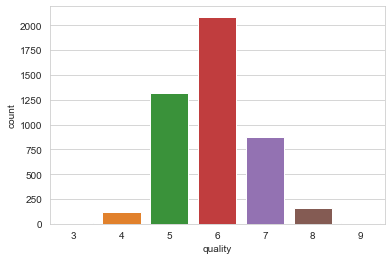

In [15]:
#Histogram of Wine Quality with Seaborn
print('Wine Quality')
sns.countplot(x='quality', data=winedf)

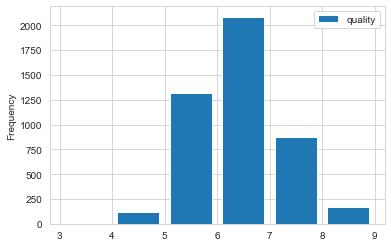

In [16]:
#Histogram of Wine Quality with pyplot
import matplotlib.pyplot as plt
import pandas as pd

winedf[['quality']].plot(kind='hist',bins=[3,4,5,6,7,8,9],rwidth=0.8)
plt.show()

In [17]:
#Reassign Wine Quality to Rating
conditions = [
    (winedf['quality'] >= 7),
    (winedf['quality'] <= 4)
]

rating = ['superior', 'inferior']
winedf['rating'] = np.select(conditions, rating, default='fine')
winedf.rating.value_counts()

fine        3405
superior    1040
inferior     130
Name: rating, dtype: int64

Wine Rating


<AxesSubplot:xlabel='rating', ylabel='count'>

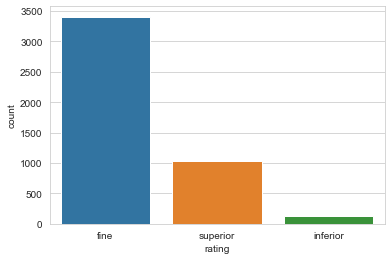

In [18]:
#Histogram of Wine Rating
print('Wine Rating')
sns.countplot(x='rating', data=winedf)

<h2>Histograms</h2>

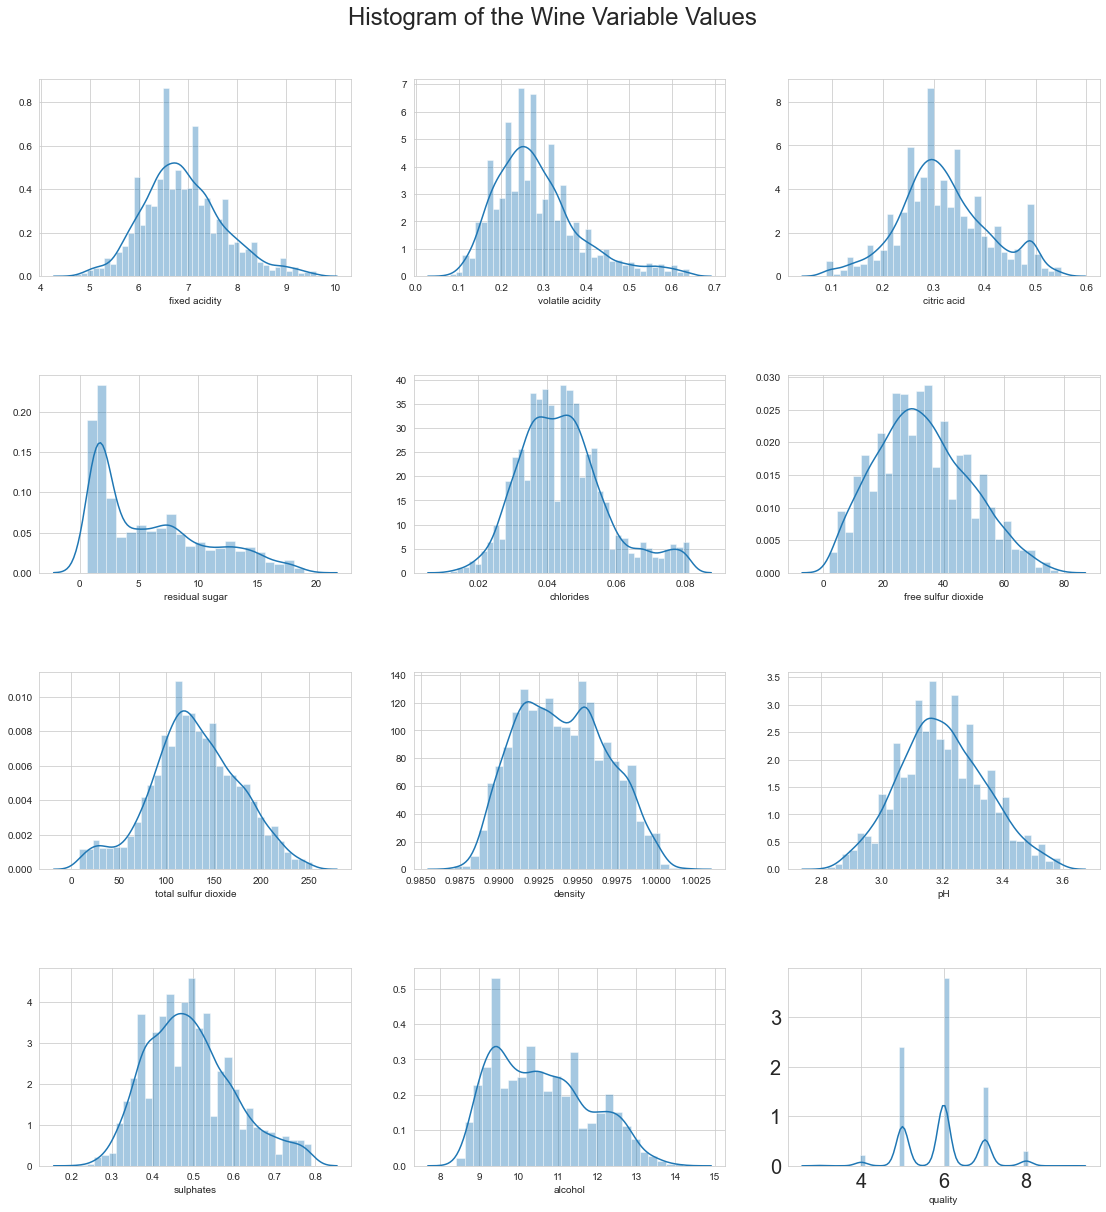

In [19]:
def subplot_hist(data, row = 4, column = 3, title = "Subplots", height = 20, width = 19):
    # Create a figure instance, and the subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=24, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        plot = sns.distplot(winedf.iloc[:, i], ax=ax)
    # Show the plot
    plot.tick_params(labelsize = 20)
    plt.show()

plot_columns = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates','alcohol','quality']
    


myhistplot = subplot_hist(winedf[plot_columns], row = 4, column = 3, title = "Histogram of the Wine Variable Values")






In [20]:
winedf_bins = winedf.copy()
bins = [0,5,10]

labels = [0,1] #low=0,high-1
winedf_bins['quality_range']=pd.cut(x=winedf_bins['quality'],bins=bins,labels=labels)
print(winedf_bins[['quality_range','quality']].head(10))

winedf_bins = winedf_bins.drop('quality',axis=1)

   quality_range  quality
20             1        6
25             0        5
26             0        5
33             1        6
37             1        7
48             0        5
49             0        5
53             0        5
58             0        5
59             1        6


In [21]:
winedf_bins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4575 entries, 20 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         4575 non-null   float64 
 1   volatile acidity      4575 non-null   float64 
 2   citric acid           4575 non-null   float64 
 3   residual sugar        4575 non-null   float64 
 4   chlorides             4575 non-null   float64 
 5   free sulfur dioxide   4575 non-null   float64 
 6   total sulfur dioxide  4575 non-null   float64 
 7   density               4575 non-null   float64 
 8   pH                    4575 non-null   float64 
 9   sulphates             4575 non-null   float64 
 10  alcohol               4575 non-null   float64 
 11  wine type             4575 non-null   object  
 12  rating                4575 non-null   object  
 13  quality_range         4575 non-null   category
dtypes: category(1), float64(11), object(2)
memory usage: 66

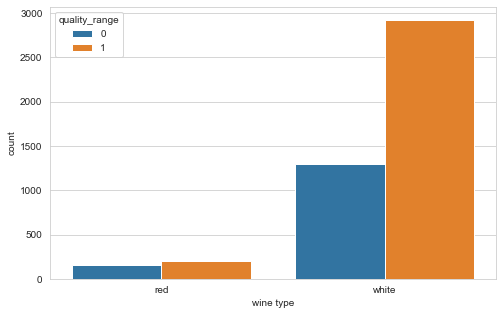

In [22]:
plt.figure(figsize=(8,5))

sns.countplot(x = 'wine type', hue = 'quality_range', data = winedf_bins)
plt.show()

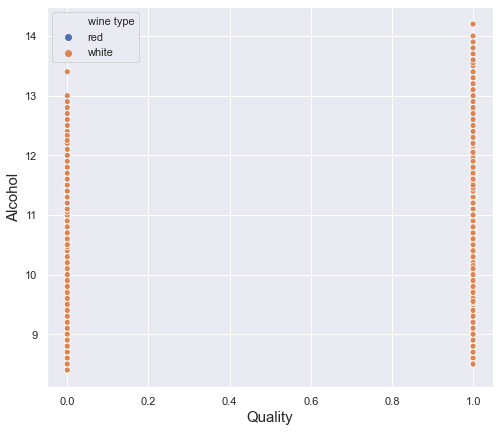

In [23]:
import seaborn as sns; sns.set()

plt.figure(figsize=(8,7))
#sns.countplot(x = 'wine type', hue = 'alcohol', data = winedf_bins)
sns.scatterplot(x='quality_range', y='alcohol', hue='wine type',data=winedf_bins)
plt.xlabel('Quality', size = 15)
plt.ylabel('Alcohol', size = 15)
plt.show()

# Computing Skewness

In [24]:
# Computing the skewness into dataFrame
def skewness_check(data):
    # Find the skewness in the dataset
    skew_value = list(st.skew(data))
    skew_string = []
    # Looping through the skew value to find the Skew category
    for skew in skew_value:
        if skew >= -.5 and skew <= .5:
            skew_string.append("Light Skewed")
        elif skew <= -.5 and skew >= -1 and skew <= .5 and skew >= 1:
            skew_string.append("Moderately Skewed")
        else:
            skew_string.append("Heavily Skewed")
    # Ctreating data frame
    skew_df = pd.DataFrame({'Column': data.columns, 'Skewness': skew_value, 'Skew Category': skew_string})
    return skew_df

# Skewness for Wine
print('Wine Skewness')

skewness_check(winedf[plot_columns])

Wine Skewness


,Column,Skewness,Skew Category
0,fixed acidity,0.453980,Light Skewed
1,volatile acidity,1.031130,Heavily Skewed
2,citric acid,0.216880,Light Skewed
3,residual sugar,0.822170,Heavily Skewed
4,chlorides,0.655060,Heavily Skewed
5,free sulfur dioxide,0.312143,Light Skewed
6,total sulfur dioxide,-0.075947,Light Skewed
7,density,0.156756,Light Skewed
8,pH,0.169411,Light Skewed
9,sulphates,0.518275,Heavily Skewed


<h2>Box Plots</h2>

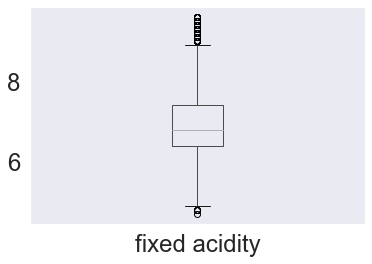

In [25]:
winedf.boxplot(column=['fixed acidity'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/01BoxPlotFixedAcidity.png")

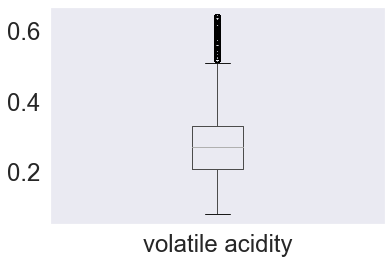

In [26]:
winedf.boxplot(column=['volatile acidity'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/02BoxPlotVolatileAcidity.png")
              

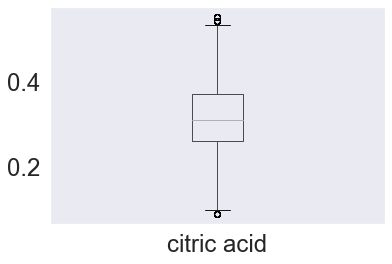

In [27]:
winedf.boxplot(column=['citric acid'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/03BoxPlotCitricAcid.png")

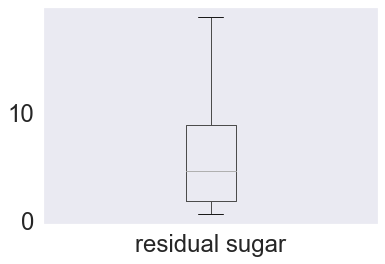

In [28]:
winedf.boxplot(column=['residual sugar'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/04BoxPlotResidualSugar.png")

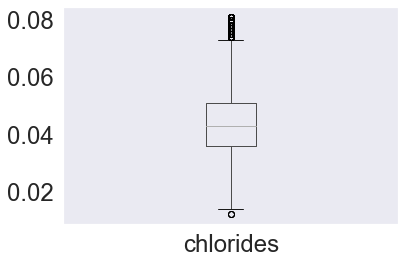

In [29]:
winedf.boxplot(column=['chlorides'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/05BoxChlorides.png")

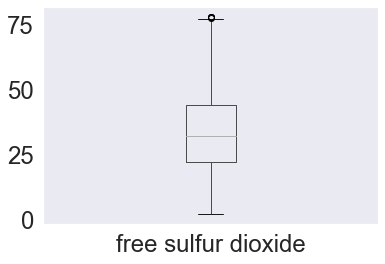

In [30]:
winedf.boxplot(column=['free sulfur dioxide'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/06BoxPlotFreeSulfurDioxide.png")

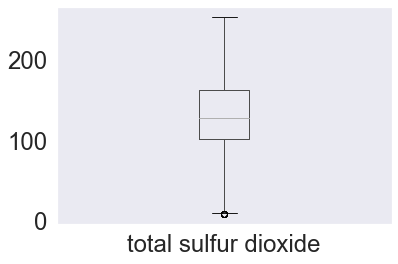

In [31]:
winedf.boxplot(column=['total sulfur dioxide'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/07BoxPlotTotalSulfurDioxide.png")

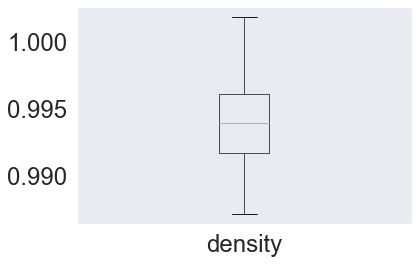

In [32]:
winedf.boxplot(column=['density'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/08BoxPlotDensity.png")

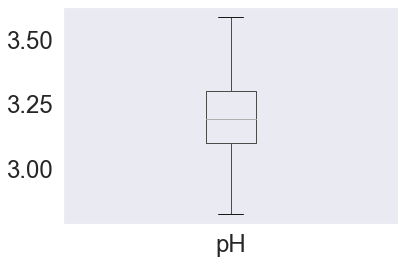

In [33]:
winedf.boxplot(column=['pH'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/09BoxPlotpH.png")

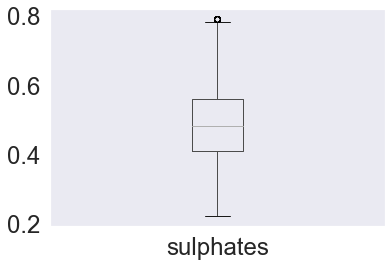

In [34]:
winedf.boxplot(column=['sulphates'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/10BoxPlotSulphates.png")

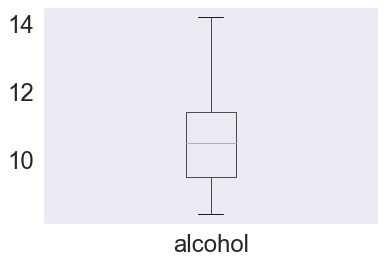

In [35]:
winedf.boxplot(column=['alcohol'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/11BoxPlotAlcohol.png")

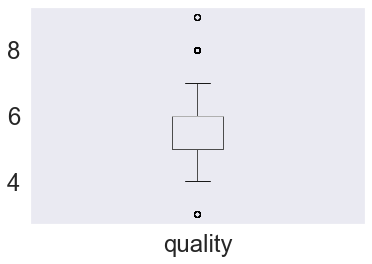

In [36]:
winedf.boxplot(column=['quality'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/12BoxPlotQuality.png")

Observations regarding Wine variables

<ul>
    <li>Quality is normally distributed with a slight left skew. Most values in Quality are concentrated in 5, 6 and 7. Values range from 3 to 9, with no values in 1, 2, or 10.
    <li>All variables have outliers, mostly on the large side (left-skewed).
    <li>The distributions for fixed acidity, volatile acidity and citric acid would be symmetricdal if outliers were removed. 
    <li>In contract, removing outliers from residual sugar would have little or no effect on its skewness; it will remain positively skewed.
    <li>Density and alcohol have only a few outliers, making it different from the other variables
    <li>Alcohol does not have a normal distributiomn. It has an irregular, step-down pattern toward higher alcohol levels. It does not have any pronounced outliers.
    <li>Total Sulfur Dioxide and Density appear to have bimodal distributions.
    <li>Range is much larger compared to the IQR. Mean is usually greater than the median.  These observations indicate that there are outliers in the data set and before any analysis is performed outliers must be taken care of.

</ul>

  

<h2>Correlation Between Target Variable and Predictor Attributes</h2>

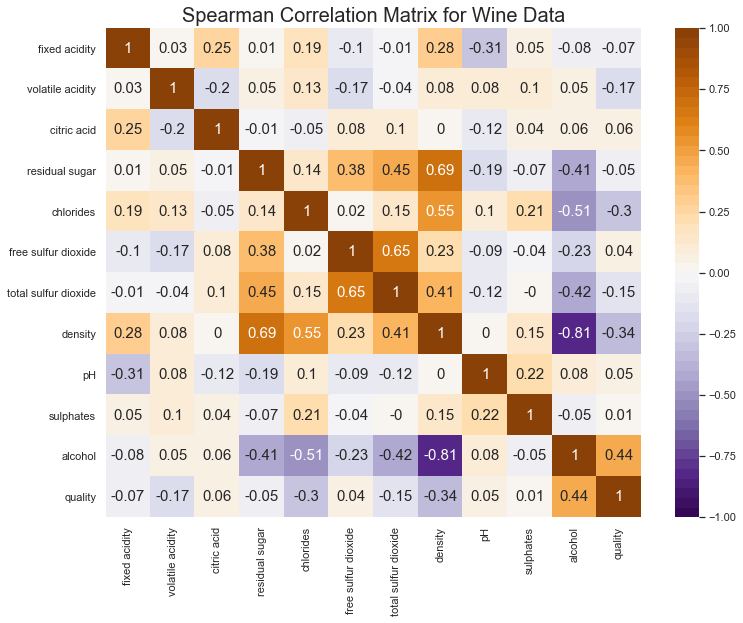

<Figure size 432x288 with 0 Axes>

In [38]:
def confusion_matrix_plot(data, title = "Wine Correlation Matrix", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="spearman"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(winedf, title = "Spearman Correlation Matrix for Wine Data")
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/CorrelationMatricesBOD/WineSpearmanBOD.png")





In [344]:
winedf.corr(method ="spearman")['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.446925
citric acid             0.105711
free sulfur dioxide     0.086865
pH                      0.032538
sulphates               0.029831
residual sugar         -0.016891
total sulfur dioxide   -0.054777
fixed acidity          -0.098154
volatile acidity       -0.257806
chlorides              -0.295054
density                -0.322806
Name: quality, dtype: float64

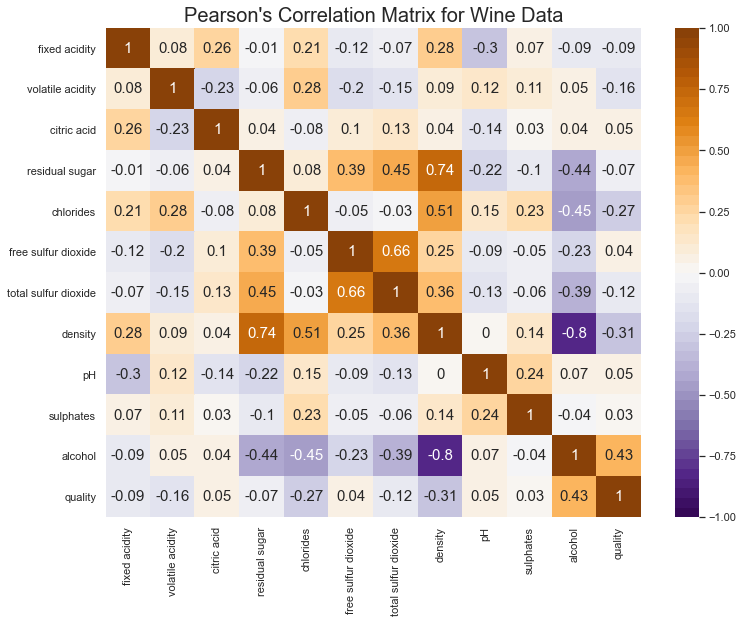

<Figure size 432x288 with 0 Axes>

In [39]:
def confusion_matrix_plot(data, title = "Wine Correlation Matrix", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="pearson"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(winedf, title = "Pearson's Correlation Matrix for Wine Data")
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/CorrelationMatricesBOD/WinePearsonsBOD.png")



In [40]:
winedf.corr(method ="pearson")['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.432710
pH                      0.049083
citric acid             0.048409
free sulfur dioxide     0.041818
sulphates               0.030125
residual sugar         -0.073186
fixed acidity          -0.087174
total sulfur dioxide   -0.119894
volatile acidity       -0.163855
chlorides              -0.267661
density                -0.310473
Name: quality, dtype: float64

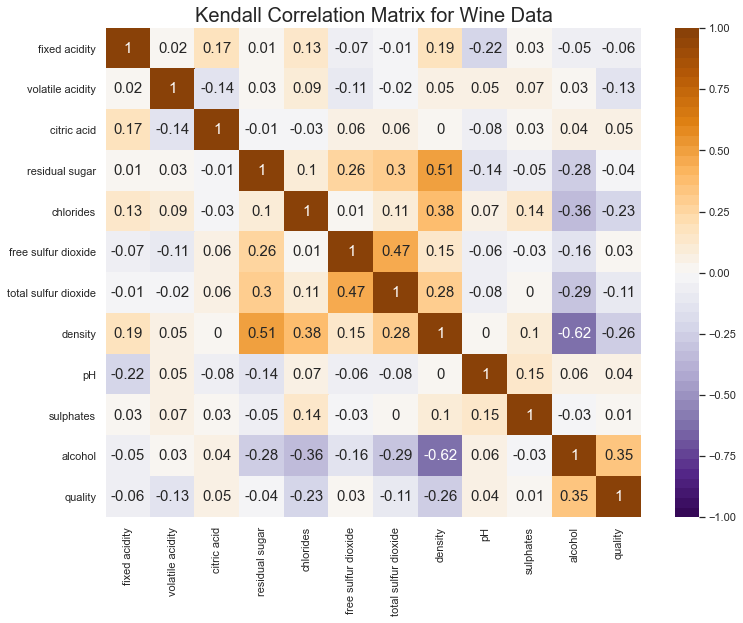

<Figure size 432x288 with 0 Axes>

In [41]:
def confusion_matrix_plot(data, title = "Wine Correlation Matrix", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="kendall"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(winedf, title = "Kendall Correlation Matrix for Wine Data")
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/CorrelationMatricesBOD/WineKendallBOD.png")



In [42]:
winedf.corr(method ="kendall")['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.345778
citric acid             0.049765
pH                      0.038388
free sulfur dioxide     0.032023
sulphates               0.011683
residual sugar         -0.039669
fixed acidity          -0.057232
total sulfur dioxide   -0.112757
volatile acidity       -0.133324
chlorides              -0.234052
density                -0.260015
Name: quality, dtype: float64

We want to find values that are either highly positively correlated (close to 1) or highly negatively correlated (close to negative 1). Looking at the bottom row (or rightmost column), we can see the correlation coefficients between the target variable, quality, and the indicator variables.  Of course, quality is perfectly correlated with itself, so we will ignore that. 

The most significant correlation coeffients for red wine quality in descending order are (1) alcohol (0.45), (2) density (-0.32), (3) chlorides (-0.30), (4) volatile acidity (-0.26), (5) citric acid (.11), (6) fixed acidity (-0.098), (7) free sulfur dioxide (0.087), (8) total sulfur dioxide (-0.055),(9) pH (-0.033), (10) sulphates (-0.030), and (11) residual sugar (-0.017).

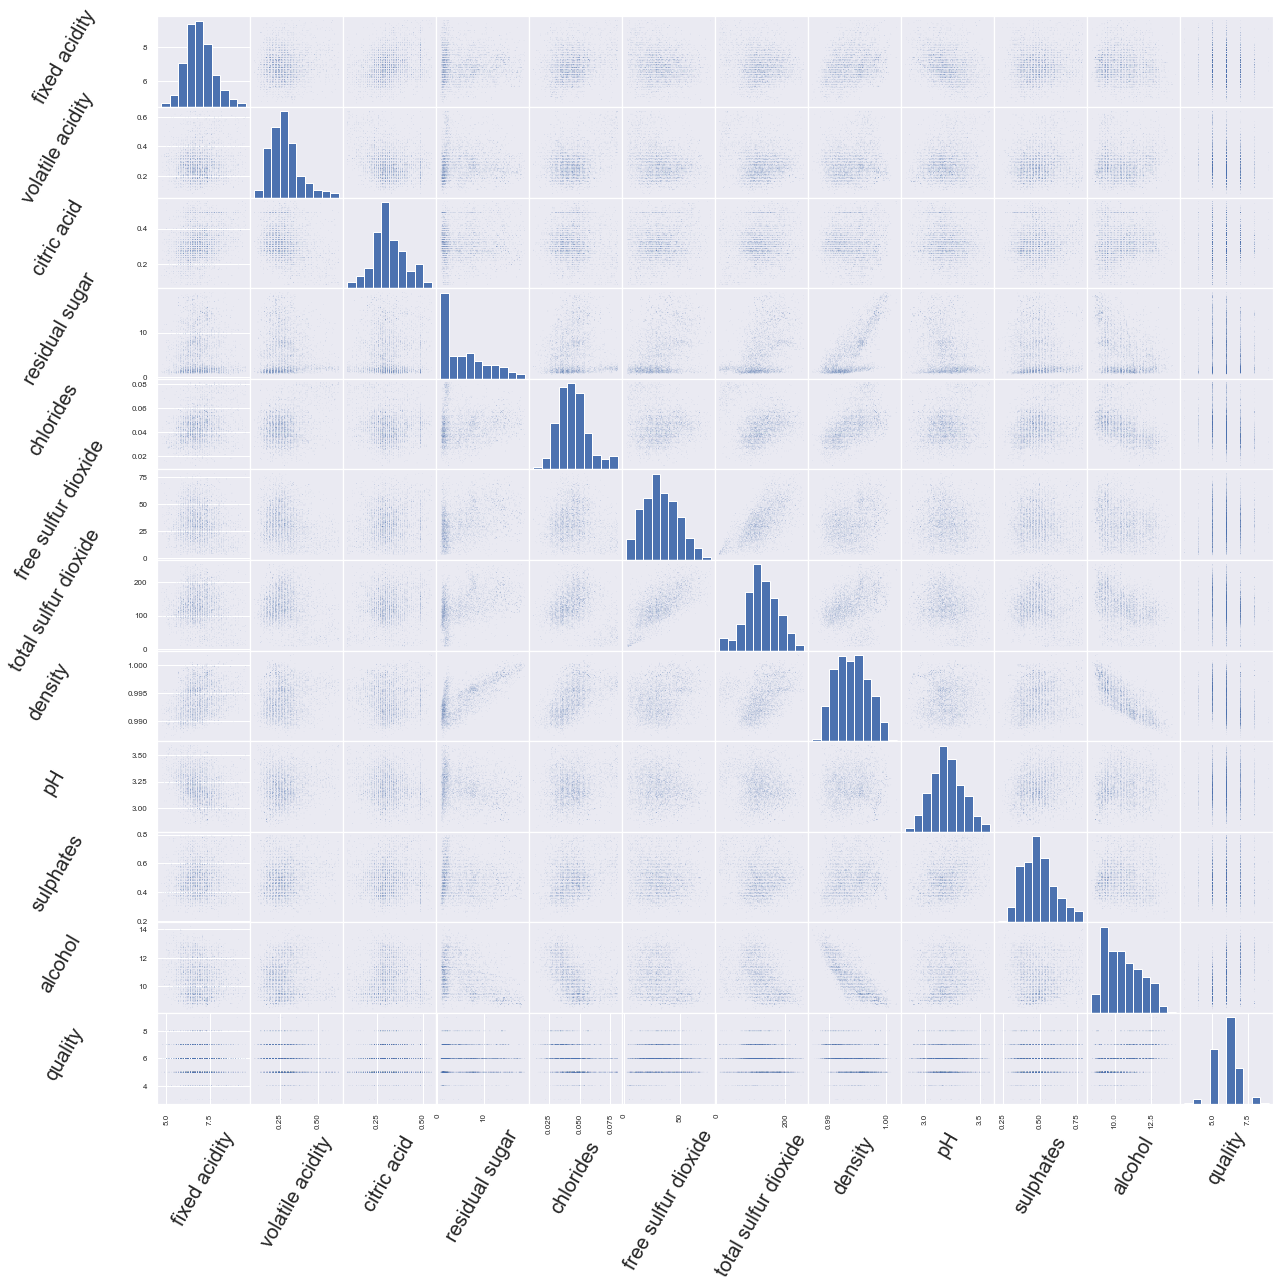

In [43]:
scatter_matrix = pd.plotting.scatter_matrix(
    winedf,
    figsize  = [20, 20],
    marker   = ".",
    s        = 0.5,
    diagonal = "hist",
    range_padding = 0.1
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 60)
    ax.set_ylabel(ax.get_ylabel(), labelpad = 70, fontsize = 20, rotation = 60)
    
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/winescattermatrix.png")

<h2>Wine Quality Indicators</h2>

<h3>1. Alcohol</h3>

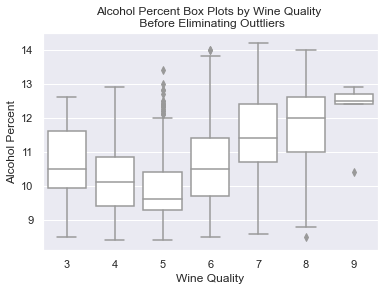

In [44]:
bx = sns.boxplot(x='quality', y='alcohol', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol Percent Box Plots by Wine Quality \n Before Eliminating Outtliers')

plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/BoxPlotsBeforeOD/01AlcoholByQualityBOD.png")

<h3>2. Density</h3>  

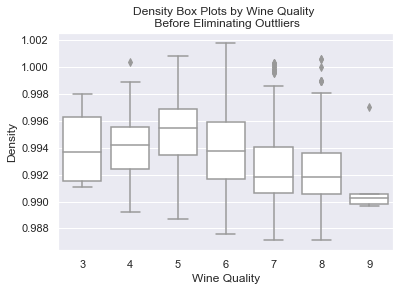

In [45]:
bx = sns.boxplot(x='quality', y='density', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Density', title='Density Box Plots by Wine Quality \n Before Eliminating Outtliers')
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/BoxPlotsBeforeOD/02DensityByQualityBOD.png")

<h3>3. Chlorides</h3>    

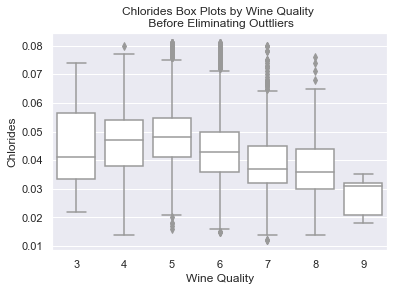

In [46]:
bx = sns.boxplot(x='quality', y='chlorides', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Chlorides', title='Chlorides Box Plots by Wine Quality \n Before Eliminating Outtliers')
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/BoxPlotsBeforeOD/03ChloridesByQualityBOD.png")

<h3>4. Volatile Acidity</h3>      

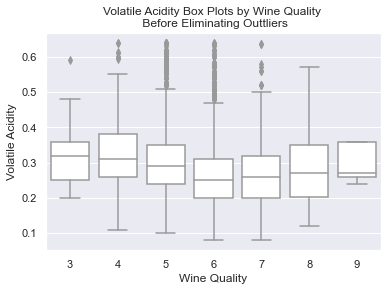

In [47]:
bx = sns.boxplot(x='quality', y='volatile acidity', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Volatile Acidity', title='Volatile Acidity Box Plots by Wine Quality \n Before Eliminating Outtliers')
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/BoxPlotsBeforeOD/04VolatileAcidityByQualityBOD.png")

<h3>5. Citric Acid</h3>

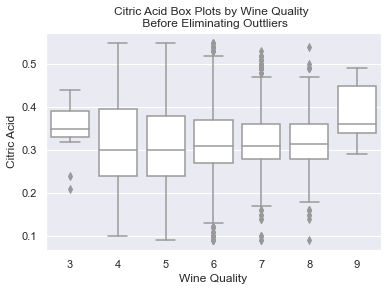

In [48]:
bx = sns.boxplot(x='quality', y='citric acid', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Citric Acid', title='Citric Acid Box Plots by Wine Quality \n Before Eliminating Outtliers')
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/BoxPlotsBeforeOD/05itricAcidByQualityBOD.png")

<h3>6. Fixed Acidity</h3>  

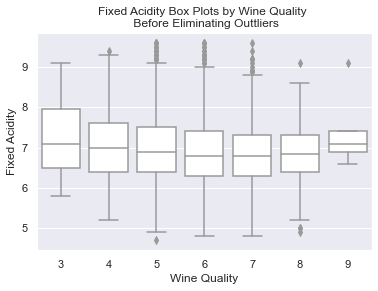

In [49]:
bx = sns.boxplot(x='quality', y='fixed acidity', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Fixed Acidity', title='Fixed Acidity Box Plots by Wine Quality \n Before Eliminating Outtliers')
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/BoxPlotsBeforeOD/06FixedAcidityByQualityBOD.png")

<h3>7. Free Sulfur Dioxide</h3>  

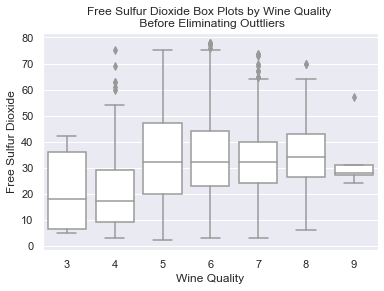

In [50]:
bx = sns.boxplot(x='quality', y='free sulfur dioxide', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Free Sulfur Dioxide', title='Free Sulfur Dioxide Box Plots by Wine Quality \n Before Eliminating Outtliers')
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/BoxPlotsBeforeOD/07FreeSulfurDioxideByQualityBOD.png")


<h3>8. Total Sulfur Dioxide</h3> 

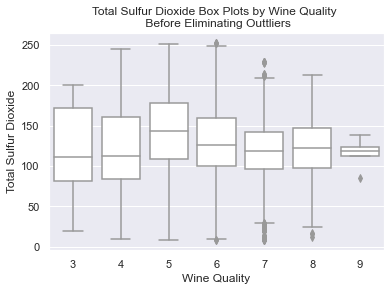

In [51]:
bx = sns.boxplot(x='quality', y='total sulfur dioxide', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Total Sulfur Dioxide', title='Total Sulfur Dioxide Box Plots by Wine Quality \n Before Eliminating Outtliers')
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/BoxPlotsBeforeOD/08TotalSulfurByQualityBOD.png")

<h3>9. pH</h3> 

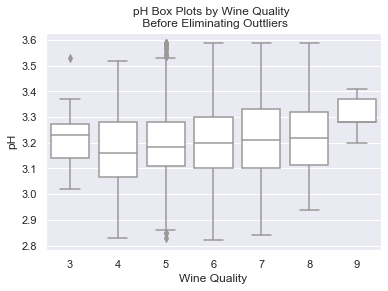

In [52]:
bx = sns.boxplot(x='quality', y='pH', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='pH', title='pH Box Plots by Wine Quality \n Before Eliminating Outtliers')
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/BoxPlotsBeforeOD/09pHByQualityBOD.png")

<h3>10. Sulphates</h3>

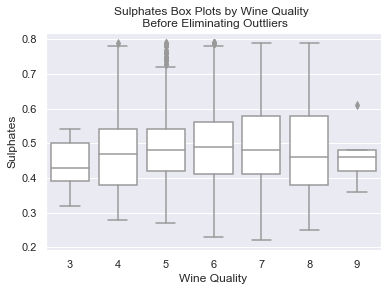

In [53]:
bx = sns.boxplot(x='quality', y='sulphates', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Sulphates', title='Sulphates Box Plots by Wine Quality \n Before Eliminating Outtliers')
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/BoxPlotsBeforeOD/10SulphatesByQualityBOD.png")

<h3>11. Residual Sugar</h3>

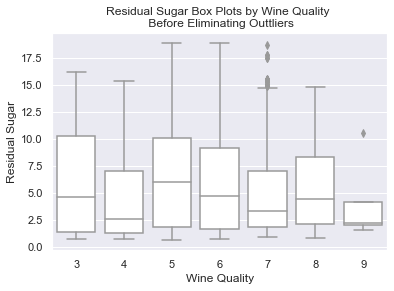

In [54]:
bx = sns.boxplot(x='quality', y='residual sugar', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Residual Sugar', title='Residual Sugar Box Plots by Wine Quality \n Before Eliminating Outtliers')
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/BoxPlotsBeforeOD/11ResidualSugarByQualityBOD.png")

<h2>Identifying and Removing Outliers</h2>
<p>A predictor variable is considered to be an outlier only if it is > Q<sub>3</sub> + 1.5 IQR. Because all skewed datta are positively skewed, we only need to eliminate those values.</p>

In [55]:
winedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4575 entries, 20 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4575 non-null   float64
 1   volatile acidity      4575 non-null   float64
 2   citric acid           4575 non-null   float64
 3   residual sugar        4575 non-null   float64
 4   chlorides             4575 non-null   float64
 5   free sulfur dioxide   4575 non-null   float64
 6   total sulfur dioxide  4575 non-null   float64
 7   density               4575 non-null   float64
 8   pH                    4575 non-null   float64
 9   sulphates             4575 non-null   float64
 10  alcohol               4575 non-null   float64
 11  quality               4575 non-null   int64  
 12  wine type             4575 non-null   object 
 13  rating                4575 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 696.1+ KB


In [56]:
winedf_a = winedf
ValueList = ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')

for myValue in ValueList:
    #compute range of data
    myValueMax = winedf_a[myValue].max()
    myValueMin = winedf_a[myValue].min()
    myValueRange = myValueMax - myValueMin
    
    # Computing IQR
    Q1 = winedf_a[myValue].quantile(0.25)
    Q3 = winedf_a[myValue].quantile(0.75)
    IQR = Q3 - Q1
    gtdropvalue = (Q3 + (1.5 * IQR))
    ltdropvalue = (Q1 - (1.5 * IQR))
    
    index_names_right = winedf_a[winedf_a[myValue] >= gtdropvalue].index
    index_names_left = winedf_a[winedf_a[myValue] <= ltdropvalue].index
    winedf_a.drop(index_names_right, inplace = True)
    winedf_a.drop(index_names_left, inplace = True)
    print(myValue + ' maximum: ' + str(myValueMax))
    print(myValue + ' minimum: ' + str(myValueMin))
    print(myValue + ' Q1: ' + str(Q1))
    print(myValue + ' Q3: ' + str(Q3))
    print(myValue + ' range: ' + str(myValueRange))
    print(myValue + ' IQR: ' + str(IQR))
    print('ratio of Range fo IQR: ' + str(myValueRange/IQR))
    print()
    
    


# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
#filtered = df.query('(@Q1 - 1.5 * @IQR) <= nb <= (@Q3 + 1.5 * @IQR)')

#df.drop(df[df['d'] >500000].index, inplace = True)

fixed acidity maximum: 9.6
fixed acidity minimum: 4.7
fixed acidity Q1: 6.4
fixed acidity Q3: 7.4
fixed acidity range: 4.8999999999999995
fixed acidity IQR: 1.0
ratio of Range fo IQR: 4.8999999999999995

volatile acidity maximum: 0.64
volatile acidity minimum: 0.08
volatile acidity Q1: 0.21
volatile acidity Q3: 0.33
volatile acidity range: 0.56
volatile acidity IQR: 0.12000000000000002
ratio of Range fo IQR: 4.666666666666666

citric acid maximum: 0.55
citric acid minimum: 0.09
citric acid Q1: 0.27
citric acid Q3: 0.37
citric acid range: 0.4600000000000001
citric acid IQR: 0.09999999999999998
ratio of Range fo IQR: 4.600000000000001

residual sugar maximum: 18.95
residual sugar minimum: 0.6
residual sugar Q1: 1.8
residual sugar Q3: 9.1
residual sugar range: 18.349999999999998
residual sugar IQR: 7.3
ratio of Range fo IQR: 2.513698630136986

chlorides maximum: 0.081
chlorides minimum: 0.012
chlorides Q1: 0.035
chlorides Q3: 0.05
chlorides range: 0.069
chlorides IQR: 0.015
ratio of Range